In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Dataset.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [6]:
print (X);

[[    23  54531]
 [    44  28712]
 [    57 124101]
 [    51  85455]
 [    29  94744]
 [    24 141787]
 [    27 149749]
 [    34  25109]
 [    43 141332]
 [    38  69268]
 [    45 120737]
 [    19  74615]
 [    18 102503]
 [    53 143274]
 [    43  49759]
 [    46 105708]
 [    38  80112]
 [    28 122471]
 [    57 146740]
 [    28 143153]
 [    53  46589]
 [    56  50015]
 [    57  49009]
 [    52 103309]
 [    51 146446]
 [    41  82046]
 [    39 126661]
 [    22  46143]
 [    50  26154]
 [    53  41804]
 [    37  61688]
 [    36  84288]
 [    52  71195]
 [    34  40581]
 [    51  72648]
 [    26  50087]
 [    43  69930]
 [    19  52981]
 [    26  89298]
 [    26  66167]
 [    57  95304]
 [    34  63408]
 [    18  59499]
 [    42 145816]
 [    57  72269]
 [    59  58559]
 [    42 134126]
 [    56  94319]
 [    52 131925]
 [    20 115317]
 [    54 116347]
 [    47  68787]
 [    55  55488]
 [    51  94441]
 [    29  94663]
 [    36  42431]
 [    54  81681]
 [    34  83483]
 [    27 14272

In [7]:
print (y);

[1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1
 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21 28]
 [26 25]]


<ipython-input-21-68593ffae3c9>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


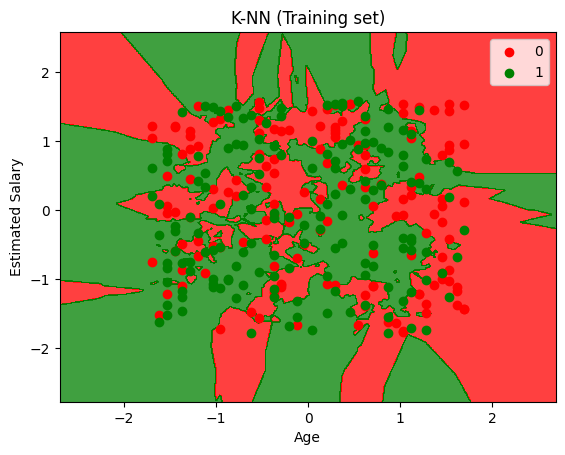

In [21]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


<ipython-input-24-4bd7e51bf276>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


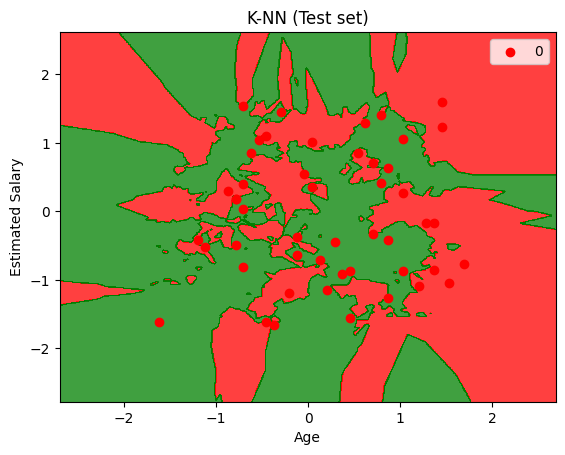

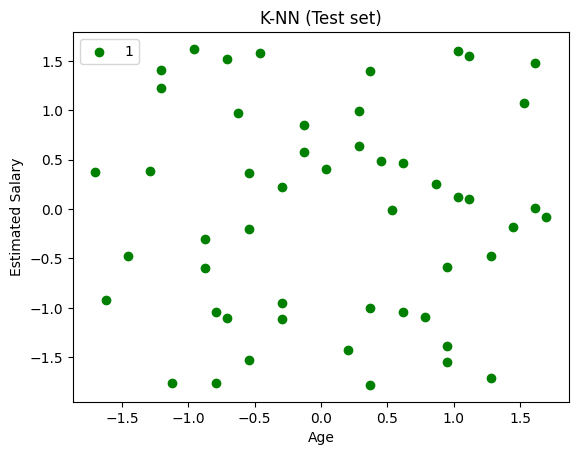

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('K-NN (Test set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()